In [1]:
import sys
sys.path.append("../")

In [2]:
import importlib
import denoise.algorithms.dsd.denoise as denoise
import denoise.algorithms.dsd.computations as dsd
import denoise.graph.io as graph_io
import time
import ctypes
import numpy as np
from denoise.graph.operations import densify
import networkx as nx

In [12]:
params       =  {
    "loc"   : "cw_normalized",
    "alpha" : 2.0,
    "beta"  : 100,
    "delta" : 0.01
}

LIB_REWEIGHT="/home/kapil/Documents/libReweight.so"
libR        = ctypes.CDLL(LIB_REWEIGHT)

In [13]:
edgelist, node_list, node_map = graph_io.parse_graph_file("../data/test_graphs/All_Graphs/Graph1.txt")
X                             = dsd.compute_embedding(edgelist)
ip = []
count = 0
node_dict = {}
node_list = []
n_count = 0
MID=1000
MID_CRC=MID+10
ADD=MID_CRC+10

with open("../data/test_graphs/All_Graphs/Graph1.txt", "rb") as ff:
    for line in ff:
        if (count < MID):
            p, q, w = line.split()[: 3]
            count += 1
            if p not in node_dict:
                node_dict[p] = n_count
                node_list.append(n_count)
                n_count += 1
            if q not in node_dict:
                node_dict[q] = n_count
                node_list.append(n_count)
                n_count += 1
            ip.append((node_dict[p], node_dict[q]))
        else:
            if(count == ADD):
                break
            p, q, w = line.split()[: 3]
            if (p in node_dict and q in node_dict):
                ip.append((node_dict[p], node_dict[q]))
                count += 1
    G = nx.Graph(ip)
    

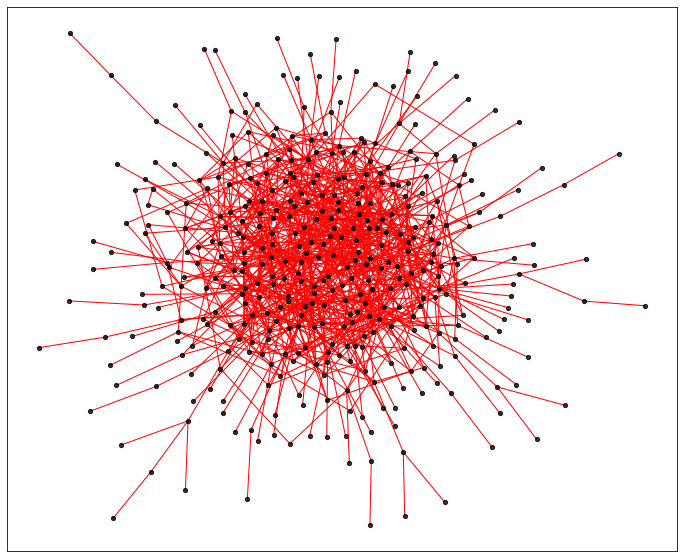

In [9]:
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)

import matplotlib.pyplot as plt 

plt.figure(figsize = (12, 10))
nx.draw_networkx_nodes(G, pos = pos,
                       nodelist= node_list,
                       node_color='k',
                       node_size=18,
                       alpha=0.8)
nx.draw_networkx_edges(G, pos,
                       edgelist=ip[: MID_CRC],
                       width=1, alpha=1, edge_color='r')
#nx.draw_networkx_edges(G, pos,
 #                      edgelicompute_cw_score_normalizedst=ip[MID_CRC : MID_CRC+5],
  #                     width=5, alpha=0.5, style = "dotted", edge_color='k')
plt.savefig("graph_sp.png")

In [14]:
tic = time.perf_counter()
updated_edgelist              = denoise.glide_predict_links(edgelist, X, params = params)[0 : 100]
print(time.perf_counter() - tic)

2.030593087998568


In [11]:
updated_edgelist

[(121, 65, 131.35572105287577),
 (201, 147, 112.22608521412825),
 (65, 63, 110.51014473303617),
 (121, 63, 110.51014473303617),
 (201, 65, 109.08802496991457),
 (201, 121, 109.08802496991457),
 (201, 71, 108.75578513217778),
 (216, 201, 105.8818262279239),
 (147, 121, 104.07240257057339),
 (147, 65, 104.07240257057337),
 (147, 71, 102.89966862435344),
 (107, 52, 102.81418219889926),
 (201, 199, 102.80102019930405),
 (201, 63, 102.59446497436323),
 (63, 11, 101.88898877636696),
 (121, 11, 100.23192092267564),
 (65, 11, 100.23192092267563),
 (201, 154, 100.0275934195351),
 (279, 201, 99.93874169075623),
 (52, 11, 99.70944216751629),
 (216, 199, 99.121360682447),
 (216, 147, 98.75567453381261),
 (279, 71, 98.68006634465796),
 (71, 65, 97.79127100830749),
 (121, 71, 97.79127100830749),
 (167, 112, 96.75210079699727),
 (112, 35, 96.71462791653356),
 (131, 11, 96.62440982682536),
 (167, 35, 96.50009952688454),
 (201, 49, 96.43748480337008),
 (216, 65, 96.34583316464531),
 (216, 121, 96.34583

In [15]:
updated_edgelist

[(121, 65, 2.2672616181321414),
 (216, 199, 2.2349096191920363),
 (112, 35, 2.2348738024461317),
 (167, 112, 2.215774662183658),
 (167, 35, 2.2154836561443387),
 (158, 28, 2.213505775046125),
 (228, 158, 2.1976501104166526),
 (228, 28, 2.1947513648565926),
 (153, 82, 2.182105561867506),
 (197, 111, 2.1796480146122033),
 (318, 300, 2.1773015439011134),
 (268, 82, 2.1729544496917548),
 (318, 134, 2.1705100117600953),
 (300, 134, 2.170471334271642),
 (161, 82, 2.1702230567919183),
 (268, 153, 2.1669492452146604),
 (156, 144, 2.166625650084155),
 (161, 153, 2.16266585044398),
 (161, 49, 2.1594059555947815),
 (91, 49, 2.157893114390233),
 (82, 49, 2.157473643238503),
 (268, 161, 2.155328812374406),
 (90, 16, 2.155254331160476),
 (228, 189, 2.155205240821482),
 (153, 49, 2.15461179273813),
 (181, 16, 2.1477073756095835),
 (188, 125, 2.1465569028640856),
 (156, 149, 2.145150206074703),
 (268, 49, 2.1447677020904607),
 (175, 80, 2.1437110409137885),
 (188, 175, 2.143474769049293),
 (272, 187, 

In [19]:
def predict_edges(adj_list, edge_list):
    A         = densify(adj_list)
    new_edges = np.array(edge_list, dtype = np.intc)
    new_edges = new_edges[:, :2]
    out       = np.zeros((no_edges, ), dtype = np.double)
    libR.predict_edge(ctypes.c_void_p(A.flatten().ctypes.data),
                      ctypes.c_void_p(up.flatten().ctypes.data),  
                      ctypes.c_int(no_nodes),
                      ctypes.c_int(no_edges),
                      ctypes.c_void_p(out.ctypes.data))
    e_list    = []
    count     = 0
    for ed in edge_list:
        p, q, _ = ed
        e_list.append((p, q, out[count]))
        count  += 1
    return e_list

# updated_edgelist
e_list = predict_edges(edgelist, updated_edgelist)
e_list

[(121, 65, 0.0017966862282536504),
 (147, 65, 0.001535523232087743),
 (147, 121, 0.0015468389837784066),
 (216, 65, 0.0011305149818786335),
 (216, 121, 0.001136636793208494),
 (199, 65, 0.0011954339660824006),
 (199, 121, 0.0012022811744928697),
 (189, 65, 0.0012588862476584461),
 (189, 121, 0.0012664819405862591),
 (121, 63, 0.0031747489117291494),
 (65, 63, 0.0031747489117291494),
 (158, 65, 0.0014691527557645222),
 (158, 121, 0.0014795081400856456),
 (65, 28, 0.009675497407859668),
 (121, 28, 0.009675497407859668),
 (228, 121, 0.001064656236905424),
 (228, 65, 0.001059283402214737),
 (216, 147, 0.0011952945895479104),
 (199, 147, 0.0012750497720381273),
 (154, 65, 0.0014753103017743504),
 (154, 121, 0.0014857529799378463),
 (279, 65, 0.0008925129099918828),
 (279, 121, 0.0008963241078247122),
 (71, 65, 0.002752733332207214),
 (121, 71, 0.0027358051542774684),
 (147, 63, 0.0034575250742865326),
 (201, 121, 0.0011963861232086146),
 (201, 65, 0.0011896057076024274),
 (189, 147, 0.00134

In [16]:
params       =  {
    "loc"           : "l3_u",
    "alpha"         : 2.0,
    "beta"          : 100,
    "delta"         : 0.01
}

In [17]:
tic = time.perf_counter()
updated_edgelist_ctype           = denoise.glide_predict_links(edgelist, X, params = params)[0 : 100]
print(time.perf_counter() - tic)

0.32895760200062796


In [18]:
updated_edgelist_ctype

[(121, 65, 269.8703061822174),
 (147, 65, 255.25311819512),
 (147, 121, 255.25311819512),
 (216, 65, 243.4822894564041),
 (216, 121, 243.4822894564041),
 (199, 65, 243.2782387920414),
 (199, 121, 243.2782387920414),
 (189, 65, 242.96552921255977),
 (189, 121, 242.96552921255977),
 (121, 63, 242.54952687073896),
 (65, 63, 242.54952687073893),
 (158, 65, 239.8329324777172),
 (158, 121, 239.8329324777172),
 (65, 28, 239.09499134194903),
 (121, 28, 239.09499134194903),
 (228, 121, 237.43486618355223),
 (228, 65, 237.4348661835522),
 (216, 147, 228.68519337757812),
 (199, 147, 228.3670768726181),
 (154, 65, 225.82724233578227),
 (154, 121, 225.82724233578227),
 (279, 65, 225.6354285467937),
 (279, 121, 225.6354285467937),
 (71, 65, 225.23591319781485),
 (121, 71, 225.23591319781482),
 (147, 63, 225.0153215672732),
 (201, 121, 224.34123174949988),
 (201, 65, 224.34123174949985),
 (189, 147, 220.77774439016412),
 (216, 199, 219.94958759093706),
 (158, 147, 218.6352146034646),
 (147, 28, 217.9